# Fake Job Analysis

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('fake_job_postings.csv')

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.shape

(17880, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


count → Number of non-null rows for each column (here, 17,880 rows in total).

mean → Average value.

std → Standard deviation (spread of the data).

min, 25%, 50%, 75%, max → Distribution of the data (quartiles).

## Dataset Insights

#### General Information
- **Total Records:** 17,880  

#### Column Insights

#### 1. `job_id`
- **Type:** Identifier (1 → 17880)  
- **Count:** 17,880 unique rows (no missing values)  
- **Distribution:** Uniformly spread, mean ≈ 8940.5 (index-like ID)  
- **Insight:** Purely an identifier column, no predictive/analytical meaning  

---

#### 2. `telecommuting` (0/1)
- **Mean:** 0.0429 → ~4.3% of jobs allow telecommuting  
- **Quartiles:** 25% = 0, 50% = 0, 75% = 0 → At least 75% of jobs are not telecommuting  
- **Max:** 1 → some jobs do allow telecommuting  
- **Insight:** Remote jobs are very rare in this dataset  

---

#### 3. `has_company_logo` (0/1)
- **Mean:** 0.795 → ~79.5% of job postings have a company logo  
- **Quartiles:** 25% = 1, 50% = 1, 75% = 1 → The majority (≥75%) include a logo  
- **Insight:** Most job postings appear to be from legitimate sources (logo presence is often a positive trust signal)  

---

#### 4. `has_questions` (0/1)
- **Mean:** 0.492 → ~49% of job postings include additional application questions  
- **Quartiles:**  
  - 25% = 0, 50% = 0 → At least 50% of postings don’t have questions  
  - 75% = 1 → At least 25% include questions  
- **Insight:** Split dataset — about half require candidates to answer screening questions, half do not  

### Key Observations

1. **Remote jobs are rare** → Only about **4.3%** of postings allow telecommuting, meaning the dataset is dominated by on-site roles.  
2. **Most postings look legitimate** → Around **79.5% have a company logo**, and about **49% include screening questions**, both of which are usually indicators of genuine jobs.  
3. **Fraudulent postings are uncommon but present** → About **4.8% of jobs are fraudulent**, making this a highly **imbalanced dataset** where fraud detection is crucial.  



# Handling missing values

In [7]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [12]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print('categorical_cols:', categorical_cols.tolist())

numerical_cols = df.select_dtypes(include=['int64','float64','bool']).columns
print('\nnumerical_cols:', numerical_cols.tolist())

categorical_cols: ['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']

numerical_cols: ['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


In [14]:
for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")


In [15]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

# Exploratory Data Analysis

In [17]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,Unknown,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Unknown,0,1,0,Other,Internship,Unknown,Unknown,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Unknown,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Unknown,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unknown,0,1,0,Unknown,Unknown,Unknown,Unknown,Unknown,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Unknown,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,Unknown,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


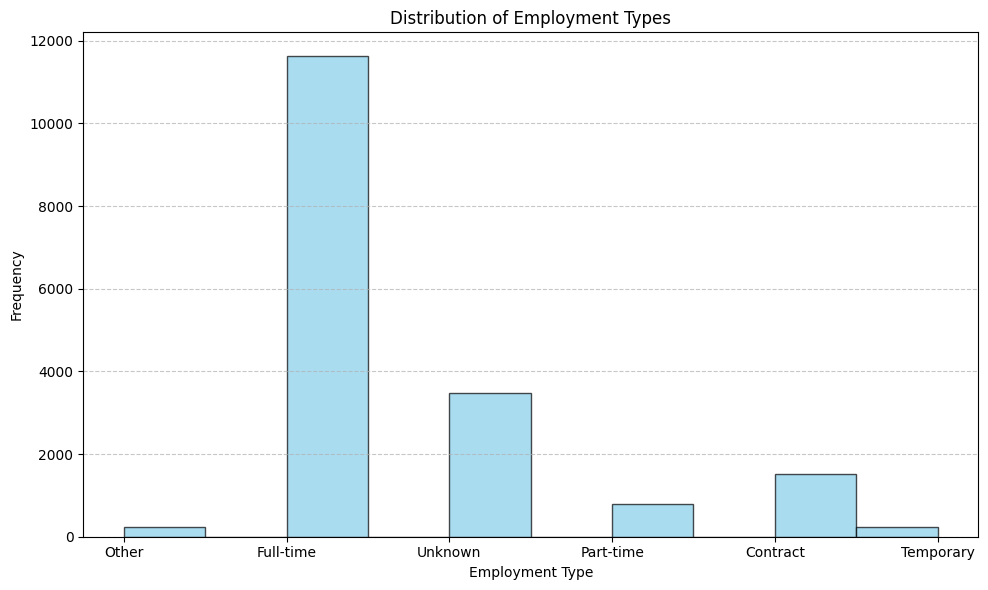

In [23]:
# Histogram for Distribution of Employemnet type

plt.figure(figsize=(10,6))
plt.hist(df.employment_type, color = 'skyblue', ec='black',alpha =0.7)
plt.title("Distribution of Employment Types")
plt.xlabel("Employment Type")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

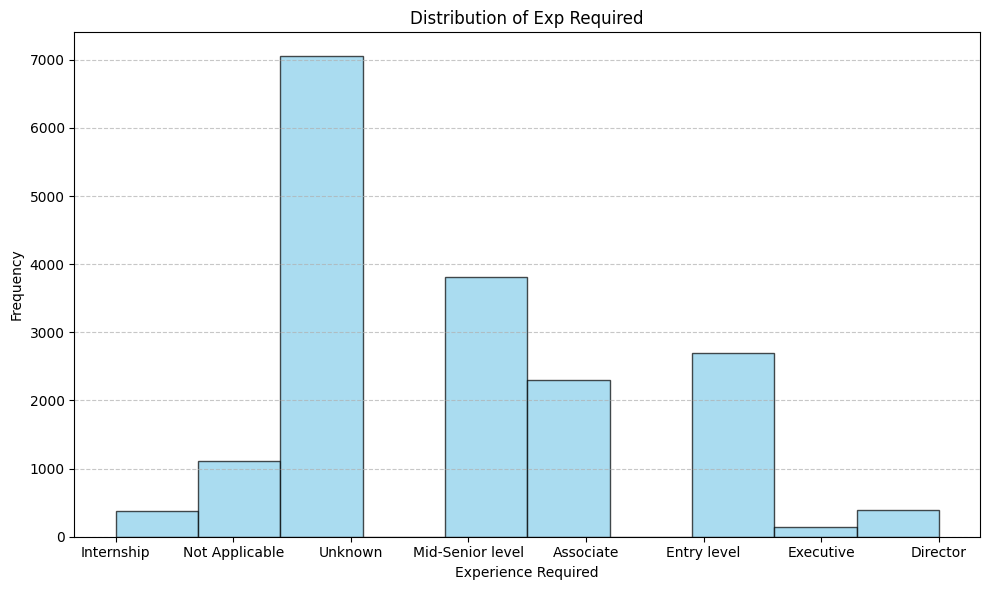

In [25]:
plt.figure(figsize=(10,6))
plt.hist(df.required_experience, color='skyblue', ec='black', alpha=0.7)
plt.title("Distribution of Exp Required")
plt.xlabel("Experience Required")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

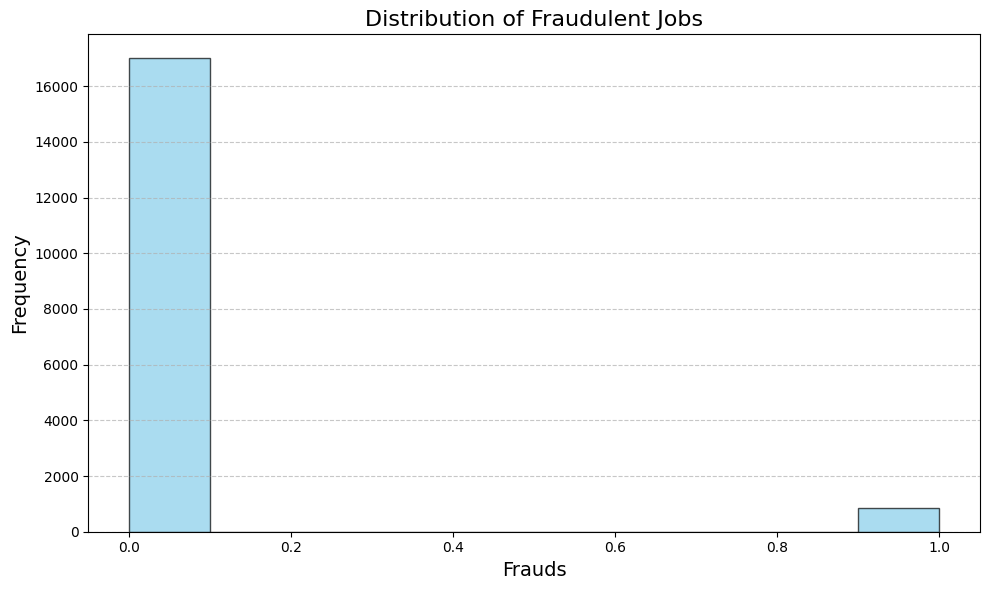

In [26]:

plt.figure(figsize=(10, 6))  
plt.hist(df.fraudulent,color='skyblue',ec='black',alpha=0.7)
plt.title("Distribution of Fraudulent Jobs", fontsize=16)
plt.xlabel("Frauds", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\himab\AppData\Local\Temp\ipykernel_23944\1019000666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='function', data=df, order=order, palette='viridis')


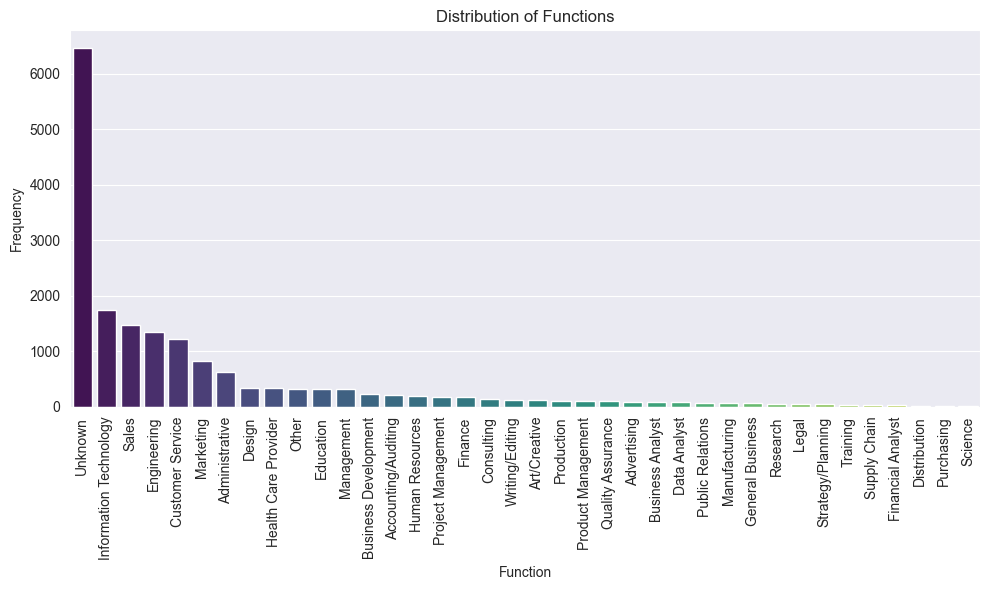

In [28]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
order = df['function'].value_counts().index
sns.countplot(x='function', data=df, order=order, palette='viridis')
plt.title("Distribution of Functions")
plt.xlabel("Function")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [29]:
df_jobs_fulltime = df[(df['employment_type']=='Full-time') & (df['fraudulent']==0)]

In [30]:
df_jobs_fulltime['title'].value_counts()

title
Customer Service Associate            145
Software Engineer                      71
Account Manager                        64
Web Developer                          50
Account Executive                      40
                                     ... 
Admin Assistant                         1
Sr Technical Lead LIMS                  1
Senior Financial Analyst (Retail)       1
Account Director - Distribution         1
Account Executive - Washington DC       1
Name: count, Length: 7079, dtype: int64


Agent-Inbound Sales Position has most opportunities of full-time job with no frauds

In [32]:
df_industry_mostfake.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,145,Forward Cap.,Unknown,Unknown,Unknown,Unknown,The group has raised a fund for the purchase o...,Unknown,Unknown,0,0,0,Unknown,Unknown,Unknown,Unknown,Unknown,1
173,174,Technician Instrument & Controls,US,Power Plant & Energy,Unknown,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
180,181,Sales Executive,"PK, SD, Karachi",Sales,Unknown,Unknown,Sales Executive,Sales Executive,Sales Executive,0,0,0,Unknown,Unknown,Unknown,Unknown,Sales,1
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1


In [31]:
df_industry_mostfake = df[df['fraudulent'] ==1]
df_industry_mostfake['industry'].value_counts()

industry
Unknown                      275
Oil & Energy                 109
Accounting                    57
Hospital & Health Care        51
Marketing and Advertising     45
                            ... 
Civil Engineering              1
Cosmetics                      1
Airlines/Aviation              1
Building Materials             1
Online Media                   1
Name: count, Length: 63, dtype: int64

Oil & Energy is the industry with the most fake jobs(109), followed by Accounting (57)


# Getting Balanced Dataset

In [33]:
df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [34]:
fraud_jobs = df[df['fraudulent']== 1]
real_jobs = df[df['fraudulent']==0]

fraud_jobs.shape, real_jobs.shape

((866, 18), (17014, 18))

In [35]:
df.shape

(17880, 18)

In [36]:
fraud_jobs = fraud_jobs.sample(17014, replace= True)
fraud_jobs.shape,real_jobs.shape


((17014, 18), (17014, 18))

In [38]:
df = pd.concat([fraud_jobs, real_jobs], ignore_index=True)
df.reset_index(drop=True, inplace=True)

In [39]:
df.shape

(34028, 18)

# Encoding


In [41]:
print(categorical_cols)

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')


In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:

df['title'] = le.fit_transform(df['title'])
df['location'] = le.fit_transform(df['location'])
df['company_profile'] = le.fit_transform(df['company_profile'])
df['requirements'] = le.fit_transform(df['requirements'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['industry'] = le.fit_transform(df['industry'])
df['function'] = le.fit_transform(df['function'])
df['salary_range'] = le.fit_transform(df['salary_range'])

In [44]:
df.reset_index()
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,17536,6759,1513,Unknown,874,1380,Optometric practice is seeking a full-time Opt...,7959,We offer a team-oriented work environment and ...,0,0,0,1,7,9,49,31,1
1,11078,7860,3077,Unknown,874,1380,See Rohan,9920,Unknown,0,0,0,5,7,9,123,36,1
2,7203,3364,3077,1221,775,1380,Responsible for all food production including ...,84,Unknown,0,0,0,0,7,9,52,36,1
3,17735,2258,2875,Customer Service,448,592,We are Seeking a candidate whose core values i...,4442,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,1,2,4,107,7,1
4,17786,113,2469,Unknown,874,1380,We are seeking professionals from all walks of...,3380,"Upon completion of training, each representati...",0,0,0,1,2,4,0,13,1


In [45]:
df.shape

(34028, 18)

# Model Building

In [46]:

X = df[['title', 'location', 'company_profile', 'requirements','telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
'required_experience', 'required_education', 'industry', 'function',
'salary_range']].values 

y = df['fraudulent'].values

In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22798, 13), (11230, 13), (22798,), (11230,))

# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=600)
lr.fit(X_train,y_train)
y_ped_lr = lr.predict(X_test)

C:\Users\himab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 600 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=600).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


solver='lbfgs': Optimization algorithm used to find the best parameters.

In [63]:
from sklearn.metrics import accuracy_score
print("Accuracy score for Logistic Regression model is:", accuracy_score(y_test, y_ped_lr))

Accuracy score for Logistic Regression model is: 0.709706144256456


# KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Empty dictionary to store results
neighbors_with_accuracies = {}
# Try k values from 1 to 19
for k in range(1, 20):
    # 1. Create a KNN model with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    # 2. Train the model on training data
    knn.fit(X_train, y_train)
    # 3. Predict on test data
    y_pred_knn = knn.predict(X_test)
    # 4. Calculate accuracy
    acc = accuracy_score(y_test, y_pred_knn)
    # 5. Store in dictionary
    neighbors_with_accuracies[k] = acc



In [53]:
neighbors_with_accuracies

{1: 0.9779162956366875,
 2: 0.9779162956366875,
 3: 0.9593054318788958,
 4: 0.9593054318788958,
 5: 0.9414959928762244,
 6: 0.9414959928762244,
 7: 0.9248441674087267,
 8: 0.9243098842386465,
 9: 0.908993766696349,
 10: 0.9090828138913625,
 11: 0.8951914514692787,
 12: 0.8953695458593054,
 13: 0.8843276936776492,
 14: 0.8818343722172751,
 15: 0.8707925200356189,
 16: 0.870080142475512,
 17: 0.8575244879786287,
 18: 0.8532502226179876,
 19: 0.8425645592163847}

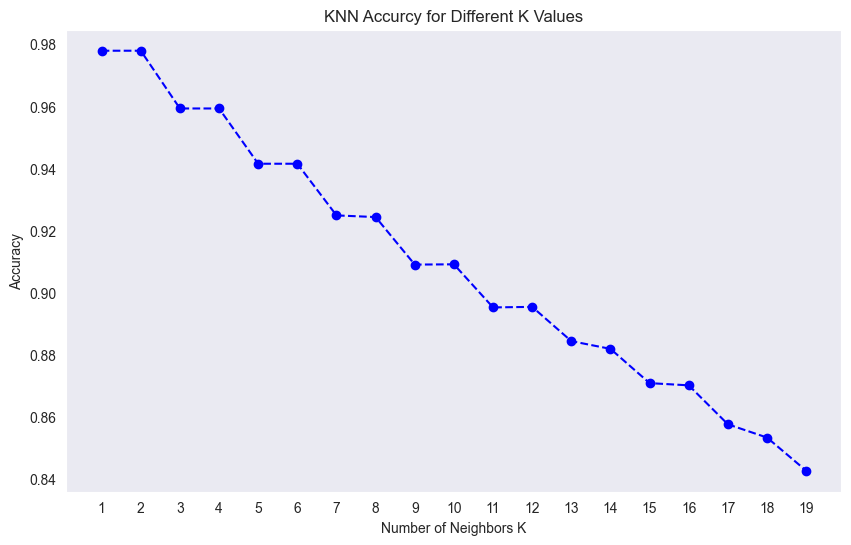

In [54]:
k_values = list(neighbors_with_accuracies.keys())
accuracies = list(neighbors_with_accuracies.values())

plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o', color='blue', linestyle='--')
plt.title("KNN Accurcy for Different K Values")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid()
plt.show()


In [55]:
max(accuracies)

0.9779162956366875

# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
# n_estimators = number of trees in the forest
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
y_pred_rf = rf.predict(X_test)
print("Accuracy score for Random Forest model is:", accuracy_score(y_test, y_pred_rf))

Accuracy score for Random Forest model is: 0.9957257346393589


# Navie Bayies

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [59]:

y_pred_nb = nb.predict(X_test)

print("Accuracy score for Naive Bayes model is:", accuracy_score(y_test, y_pred_nb))

Accuracy score for Naive Bayes model is: 0.7335707925200357


# Model Evaluation 

In [65]:

models = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Random Forest', 'Navie Bayes'],
    'Score' : [accuracy_score(y_test,y_pred_lr),
               accuracy_score(y_test,y_pred_knn),
               accuracy_score(y_test,y_pred_rf),
               accuracy_score(y_test,y_pred_nb)]})
models.sort_values(by='Score',ascending=False)

,Model,Score
2,Random Forest,0.995726
0,Logistic Regression,0.842565
1,KNN,0.842565
3,Navie Bayes,0.733571
